# TASK 1: Merge Data
- For each subject, merge their PPG signal data with HR and HRV from the master dataset based on Subject_ID.
- Save each merged dataset as a new CSV file (one per subject) in a separate folder.

In [9]:
import pandas as pd
import glob
import os

# Use a raw string (recommended)
ppg_folder = r'C:\Users\suyas\OneDrive\Desktop\CODING\CODING\Vocational Training\IIIT Naya Raipur\Python\09-07-25\Visualization\PPG_Subjects\merged_subjects'  # Current folder (PPG_Subjects)
csv_files = glob.glob(os.path.join(ppg_folder, 'subject_*.csv'))

# Load the master dataset with Subject_ID, HR, HRV, etc.
master_df = pd.read_csv('master_dataset.csv')

# Create output folder for merged files
merged_folder = './merged_subjects'
os.makedirs(merged_folder, exist_ok=True)

# Loop through each subject file and merge HR, HRV
for file_path in csv_files:
    df = pd.read_csv(file_path)
    subject_id = df['Subject_ID'].iloc[0]
    match = master_df[master_df['Subject_ID'] == subject_id]
    if not match.empty:
        for col in ['HR', 'HRV']:
            df[col] = match.iloc[0][col]
    else:
        print(f' Subject_ID {subject_id} not found in master_dataset.csv')
    # Save merged file
    filename = os.path.basename(file_path)
    output_path = os.path.join(merged_folder, filename)
    df.to_csv(output_path, index=False)
    print(f' Saved: {output_path}')

 Saved: ./merged_subjects\subject_1.csv
 Saved: ./merged_subjects\subject_10.csv
 Saved: ./merged_subjects\subject_11.csv
 Saved: ./merged_subjects\subject_12.csv
 Saved: ./merged_subjects\subject_13.csv
 Saved: ./merged_subjects\subject_14.csv
 Saved: ./merged_subjects\subject_15.csv
 Saved: ./merged_subjects\subject_16.csv
 Saved: ./merged_subjects\subject_17.csv
 Saved: ./merged_subjects\subject_18.csv
 Saved: ./merged_subjects\subject_19.csv
 Saved: ./merged_subjects\subject_2.csv
 Saved: ./merged_subjects\subject_20.csv
 Saved: ./merged_subjects\subject_3.csv
 Saved: ./merged_subjects\subject_4.csv
 Saved: ./merged_subjects\subject_5.csv
 Saved: ./merged_subjects\subject_6.csv
 Saved: ./merged_subjects\subject_7.csv
 Saved: ./merged_subjects\subject_8.csv
 Saved: ./merged_subjects\subject_9.csv


# TASK 2: Visualize Merged PPG Data
- For each merged subject CSV file, plot an interactive line chart using Plotly showing Time vs PPG.
- Include title indicating Subject_ID.

In [10]:
import plotly.express as px

# Path to merged files
merged_folder = './merged_subjects'

import glob

merged_files = glob.glob(os.path.join(merged_folder, 'subject_*.csv'))

for file_path in merged_files:
    df = pd.read_csv(file_path)
    subject_id = df['Subject_ID'].iloc[0]
    fig = px.line(df, x='Time', y='PPG', title=f'Subject {subject_id} - PPG Signal', labels={'Time': 'Time (s)', 'PPG': 'PPG Value'})
    fig.show()

# TASK 3: Combine and Split Data
- Combine all the merged subject datasets into a single DataFrame.
- Split this combined dataset into a train and test set (80%-20% split).

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Combine all merged subject CSVs into one DataFrame
merged_files = glob.glob(os.path.join(merged_folder, 'subject_*.csv'))
combined_df = pd.concat([pd.read_csv(f) for f in merged_files], ignore_index=True)

# Train-test split (80% train, 20% test)
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42, shuffle=True)

print(f'✅ Combined shape: {combined_df.shape}')
print(f'✅ Train shape: {train_df.shape}')
print(f'✅ Test shape: {test_df.shape}')

✅ Combined shape: (20000, 5)
✅ Train shape: (16000, 5)
✅ Test shape: (4000, 5)


# TASK 4: Build and Evaluate Models
- Implement 4 regression models to predict HR based on PPG, HRV, Time.
- Evaluate and visualize error metrics and predictions.

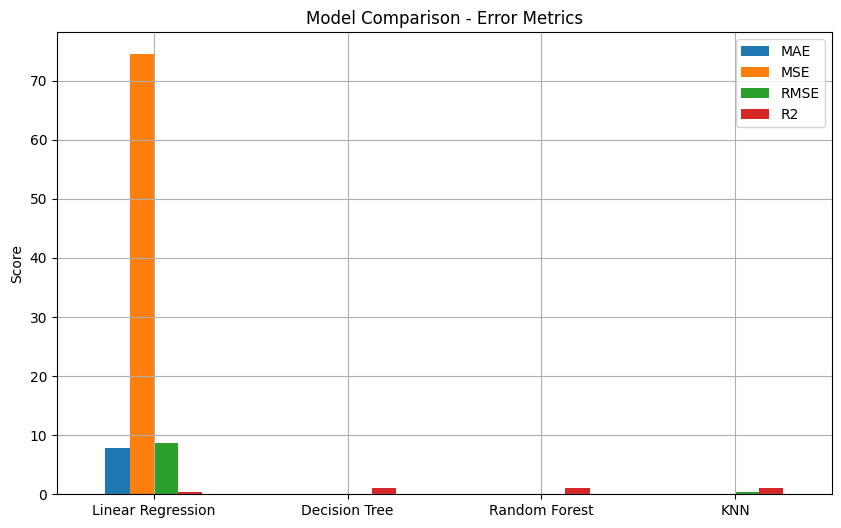

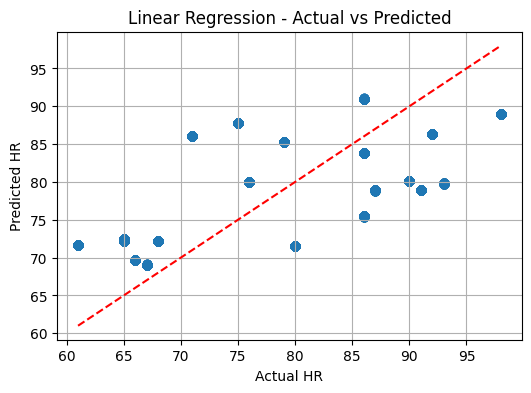

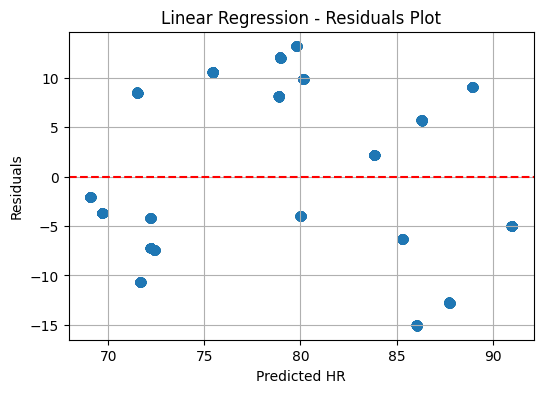

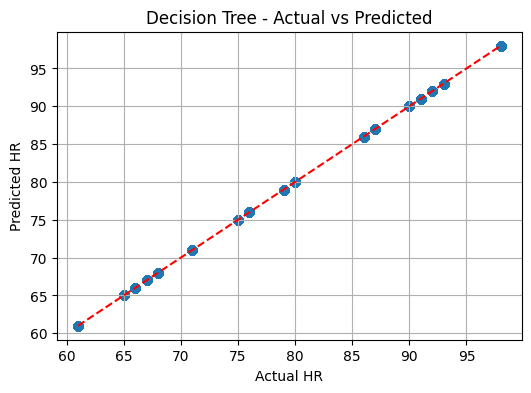

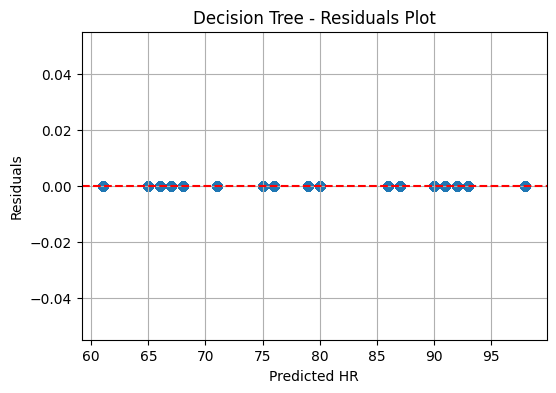

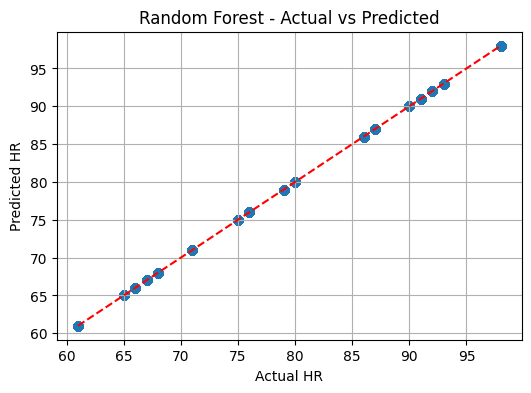

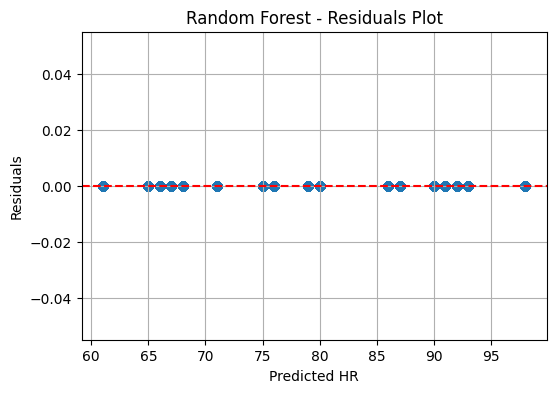

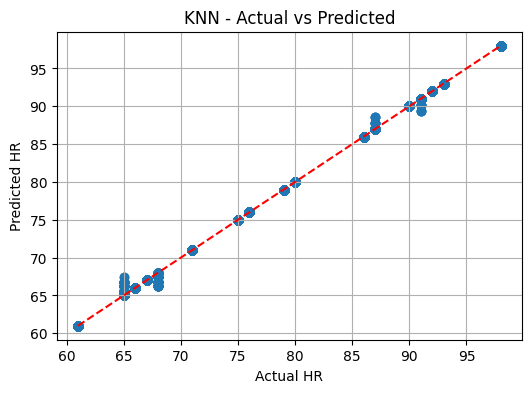

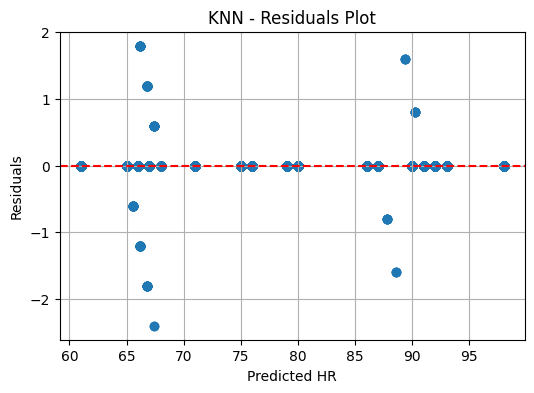

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Select features and target
features = ['PPG', 'HRV', 'Time']
target = 'HR'
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Plot error metrics comparison
results_df = pd.DataFrame(results).T
results_df[['MAE', 'MSE', 'RMSE', 'R2']].plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison - Error Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Actual vs Predicted and Residuals plots for each model
for name in models:
    y_pred = predictions[name]
    # Actual vs Predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual HR')
    plt.ylabel('Predicted HR')
    plt.title(f'{name} - Actual vs Predicted')
    plt.grid(True)
    plt.show()
    # Residuals Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted HR')
    plt.ylabel('Residuals')
    plt.title(f'{name} - Residuals Plot')
    plt.grid(True)
    plt.show()